In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from wrangle_xml import wrangle_xml, preprocessing_xml, create_validate_xml_df

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = wrangle_xml()

In [5]:
df.head(2)

,creationDate,device,endDate,sourceName,sourceVersion,startDate,type,unit,value
0,2016-06-03 17:38:46 -0500,"<<HKDevice: 0x2825a8410>, name:iPhone, manufac...",2016-06-03 16:40:52 -0500,Noah's iPhone,9.3.1,2016-06-03 16:40:09 -0500,HKQuantityTypeIdentifierStepCount,count,70.0
1,2016-06-03 17:38:46 -0500,"<<HKDevice: 0x2825a83c0>, name:iPhone, manufac...",2016-06-03 16:58:26 -0500,Noah's iPhone,9.3.1,2016-06-03 16:57:23 -0500,HKQuantityTypeIdentifierStepCount,count,68.0


In [6]:
df = preprocessing_xml(df)

In [7]:
df.head(2)

,creationDate,device,endDate,sourceName,sourceVersion,type,unit,value
startDate,,,,,,,,
2016-06-03 16:40:09,2016-06-03 17:38:46,"<<HKDevice: 0x2825a8410>, name:iPhone, manufac...",2016-06-03 16:40:52,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,70.0
2016-06-03 16:57:23,2016-06-03 17:38:46,"<<HKDevice: 0x2825a83c0>, name:iPhone, manufac...",2016-06-03 16:58:26,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,68.0


In [8]:
df_validate = create_validate_xml_df()

In [9]:
df_validate.head(2)

,Date,Steps,Distance,Floors Ascended,start_value,create_value,end_value
0,2020-08-16,14656,6.7,0,14705.0,14705.0,14705.0
1,2020-08-15,10103,4.7,8,10103.0,10103.0,10103.0


In [10]:
# How many items are the same for each column?
for i in df_validate.columns[4:]:
    var = (df_validate.Steps == df_validate[i]).sum()
    print(f'{i} has {var} dates exactly the same')

start_value has 124 dates exactly the same
create_value has 93 dates exactly the same
end_value has 124 dates exactly the same


In [11]:
for i in df_validate.columns[4:]:
    var = abs(df_validate.Steps - df_validate[i]).sum()
    print(f'{i} has an absolute difference of {var} from pedometer data')

start_value has an absolute difference of 753943.0 from pedometer data
create_value has an absolute difference of 878594.0 from pedometer data
end_value has an absolute difference of 736764.0 from pedometer data


In [12]:
for i in df_validate.columns[4:]:
    var = (df_validate.Steps - df_validate[i]).sum()
    print(f'{i} has a total difference of {var} from pedometer data')

start_value has a total difference of -71843.0 from pedometer data
create_value has a total difference of -72180.0 from pedometer data
end_value has a total difference of -71826.0 from pedometer data


In [13]:
for i in df_validate.columns[4:]:
    var = (df_validate.Steps - df_validate[i]).max()
    print(f'{i} has an absolute difference of {var} from pedometer data')

start_value has an absolute difference of 21548.0 from pedometer data
create_value has an absolute difference of 21548.0 from pedometer data
end_value has an absolute difference of 21548.0 from pedometer data


In [14]:
df_validate['start_dif'] = df_validate.Steps - df_validate.start_value

In [15]:
df_validate.sort_values('start_dif')

,Date,Steps,Distance,Floors Ascended,start_value,create_value,end_value,start_dif
531,2018-10-22,5363,2.3,3,73234.0,34313.0,1645.0,-67871.0
545,2018-10-08,2896,1.1,3,65756.0,42937.0,57.0,-62860.0
556,2018-09-27,5103,2.1,0,56741.0,5797.0,179.0,-51638.0
549,2018-10-04,5215,2.2,2,39324.0,4561.0,615.0,-34109.0
534,2018-10-19,5245,2.3,3,32512.0,18505.0,435.0,-27267.0
...,...,...,...,...,...,...,...,...
525,2018-10-28,17420,8.1,7,281.0,71870.0,71870.0,17139.0
547,2018-10-06,17611,7.3,3,0.0,0.0,0.0,17611.0
540,2018-10-13,17764,7.6,5,0.0,0.0,0.0,17764.0
533,2018-10-20,18040,7.9,5,0.0,0.0,0.0,18040.0


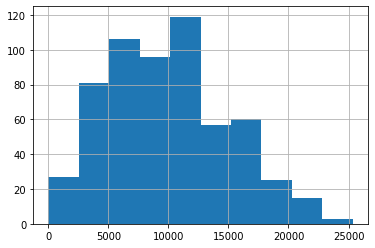

In [16]:
df_validate.Steps.hist()

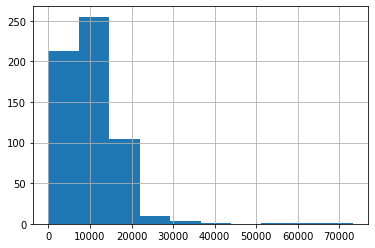

In [17]:
df_validate.start_value.hist()

In [18]:
df.resample("D").value.sum().sort_values()

startDate
2018-10-24        0.000000
2018-09-29        0.000000
2018-09-30        0.000000
2018-10-01        0.000000
2018-10-06        0.000000
                  ...     
2018-10-19    32526.649745
2018-10-04    39340.326998
2018-09-27    56764.630502
2018-10-08    65784.717293
2018-10-22    73267.383074
Name: value, Length: 1538, dtype: float64

In [19]:
df.head()

,creationDate,device,endDate,sourceName,sourceVersion,type,unit,value
startDate,,,,,,,,
2016-06-03 16:40:09,2016-06-03 17:38:46,"<<HKDevice: 0x2825a8410>, name:iPhone, manufac...",2016-06-03 16:40:52,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,70.0
2016-06-03 16:57:23,2016-06-03 17:38:46,"<<HKDevice: 0x2825a83c0>, name:iPhone, manufac...",2016-06-03 16:58:26,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,68.0
2016-06-03 17:34:29,2016-06-03 18:39:21,"<<HKDevice: 0x2825a9270>, name:iPhone, manufac...",2016-06-03 17:35:45,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,55.0
2016-06-03 17:43:01,2016-06-03 18:39:21,"<<HKDevice: 0x2825aa030>, name:iPhone, manufac...",2016-06-03 17:48:03,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,42.0
2016-06-03 17:48:03,2016-06-03 18:39:21,"<<HKDevice: 0x2825a8cd0>, name:iPhone, manufac...",2016-06-03 17:49:54,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,43.0


In [20]:
df.unit.value_counts()

count    69116
mi       67908
Name: unit, dtype: int64

In [21]:
df_distance = df[df.unit == "mi"]

In [22]:
df_distance.resample("D").value.sum().sort_values()

startDate
2018-10-14     0.000000
2018-10-30     0.000000
2018-10-27     0.000000
2018-10-26     0.000000
2018-10-25     0.000000
                ...    
2018-11-10    15.053501
2018-10-04    16.326998
2018-09-27    23.630502
2018-10-08    28.717293
2018-10-22    33.383074
Name: value, Length: 1538, dtype: float64

In [23]:
df_validate.Distance.agg(['min', 'max'])

min     0.0
max    11.7
Name: Distance, dtype: float64

In [24]:
df_validate[df_validate.Distance < .5]

,Date,Steps,Distance,Floors Ascended,start_value,create_value,end_value,start_dif
80,2020-05-28,839,0.4,0,839.0,839.0,839.0,0.0
174,2020-01-13,482,0.2,0,1741.0,1741.0,1741.0,-1259.0
231,2019-10-30,0,0.0,0,7430.0,7430.0,7430.0,-7430.0


In [25]:
df_validate[(df_validate.start_value >= 24639) |  (df_validate.end_value >= 24639) | (df_validate.create_value >= 24639)]

,Date,Steps,Distance,Floors Ascended,start_value,create_value,end_value,start_dif
302,2019-06-08,25356,11.1,0,25324.0,25079.0,25324.0,32.0
508,2018-11-14,10660,5.2,6,10414.0,31002.0,10414.0,246.0
510,2018-11-12,13999,6.3,6,20808.0,31892.0,31892.0,-6809.0
512,2018-11-10,16555,8.0,8,30535.0,5407.0,926.0,-13980.0
519,2018-11-03,7190,3.1,5,20643.0,34547.0,34547.0,-13453.0
524,2018-10-29,10829,5.5,5,29373.0,55.0,55.0,-18544.0
525,2018-10-28,17420,8.1,7,281.0,71870.0,71870.0,17139.0
531,2018-10-22,5363,2.3,3,73234.0,34313.0,1645.0,-67871.0
532,2018-10-21,9355,4.5,2,591.0,0.0,32668.0,8764.0
534,2018-10-19,5245,2.3,3,32512.0,18505.0,435.0,-27267.0


In [27]:
df_validate.mean()

Steps               9956.735144
Distance               4.388964
Floors Ascended        1.298812
start_value        10078.709677
create_value       10079.281834
end_value          10078.680815
start_dif           -121.974533
dtype: float64